In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.shape

(100000, 9)

# Data preprocessing and visualization

In [4]:
df.isna()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [5]:
df.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              

In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
df.groupby('diabetes').mean()

C:\Users\Ayush Sinha\AppData\Local\Temp\ipykernel_9432\4096129012.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetes').mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


<Axes: xlabel='smoking_history'>

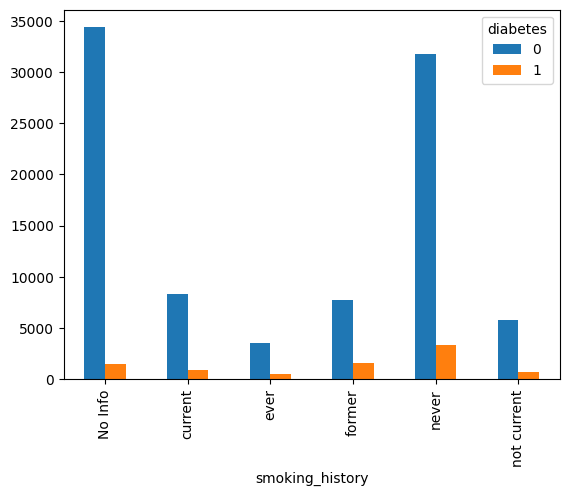

In [9]:
pd.crosstab(df['smoking_history'],df['diabetes']).plot(kind='bar',legend=True)

<Axes: xlabel='gender'>

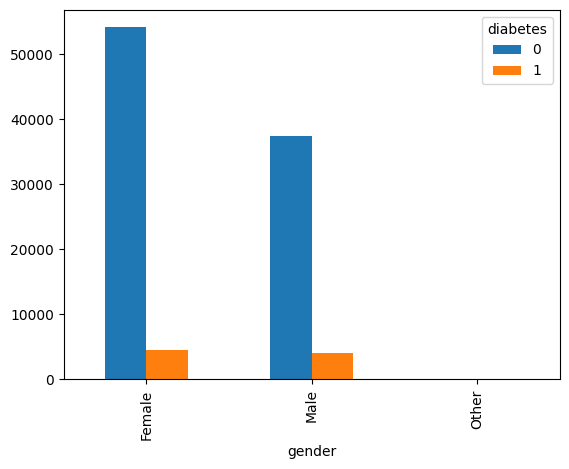

In [11]:
pd.crosstab(df['gender'],df['diabetes']).plot(kind='bar',legend=True)

In [12]:
new_df=df[['age','hypertension','heart_disease','blood_glucose_level']]
new_df

,age,hypertension,heart_disease,blood_glucose_level
0,80.0,0,1,140
1,54.0,0,0,80
2,28.0,0,0,158
3,36.0,0,0,155
4,76.0,1,1,155
...,...,...,...,...
99995,80.0,0,0,90
99996,2.0,0,0,100
99997,66.0,0,0,155
99998,24.0,0,0,100


In [14]:
newgen_dumies=pd.get_dummies(df['gender'])
newgen_dumies

,Female,Male,Other
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
99995,1,0,0
99996,1,0,0
99997,0,1,0
99998,1,0,0


In [16]:
merge=pd.concat([new_df,newgen_dumies],axis=1)
merge

,age,hypertension,heart_disease,blood_glucose_level,Female,Male,Other
0,80.0,0,1,140,1,0,0
1,54.0,0,0,80,1,0,0
2,28.0,0,0,158,0,1,0
3,36.0,0,0,155,1,0,0
4,76.0,1,1,155,0,1,0
...,...,...,...,...,...,...,...
99995,80.0,0,0,90,1,0,0
99996,2.0,0,0,100,1,0,0
99997,66.0,0,0,155,0,1,0
99998,24.0,0,0,100,1,0,0


In [17]:
final_df=merge.drop(['Other'],axis=1)
final_df

,age,hypertension,heart_disease,blood_glucose_level,Female,Male
0,80.0,0,1,140,1,0
1,54.0,0,0,80,1,0
2,28.0,0,0,158,0,1
3,36.0,0,0,155,1,0
4,76.0,1,1,155,0,1
...,...,...,...,...,...,...
99995,80.0,0,0,90,1,0
99996,2.0,0,0,100,1,0
99997,66.0,0,0,155,0,1
99998,24.0,0,0,100,1,0


In [19]:
x=final_df
x

,age,hypertension,heart_disease,blood_glucose_level,Female,Male
0,80.0,0,1,140,1,0
1,54.0,0,0,80,1,0
2,28.0,0,0,158,0,1
3,36.0,0,0,155,1,0
4,76.0,1,1,155,0,1
...,...,...,...,...,...,...
99995,80.0,0,0,90,1,0
99996,2.0,0,0,100,1,0
99997,66.0,0,0,155,0,1
99998,24.0,0,0,100,1,0


In [20]:
y=df['diabetes']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

# Train Test Split 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [27]:
lin_reg.predict(X_test)

array([0.12400549, 0.10852725, 0.24945088, ..., 0.07514505, 0.24823276,
       0.14141776])

In [28]:
lin_reg.score(X_test,y_test)

0.24784257257470999

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [31]:
log_reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
log_reg.score(X_test,y_test)

0.9412666666666667

# KNN 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
knn.score(X_test,y_test)

0.9428666666666666

# Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dclf=DecisionTreeClassifier()
dclf.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
dclf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
dclf.score(X_test,y_test)

0.9453666666666667

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
rf.score(X_test,y_test)

0.9444333333333333

# Confusion Matrix and Classification Report

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
pred=knn.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27449
           1       0.82      0.42      0.55      2551

    accuracy                           0.94     30000
   macro avg       0.89      0.70      0.76     30000
weighted avg       0.94      0.94      0.93     30000



In [48]:
matrix=confusion_matrix(y_test,pred)
matrix

array([[27222,   227],
       [ 1487,  1064]], dtype=int64)

# Comparing Accuracy

In [49]:
algorithms=['Linear Regression','Logistic Regression','KNN','Decision Tree','Random Forest']
accuracy_score = [0.2479,0.941,0.942,0.945,0.944]

In [50]:
xpos=np.arange(len(algorithms))
xpos

array([0, 1, 2, 3, 4])

In [51]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

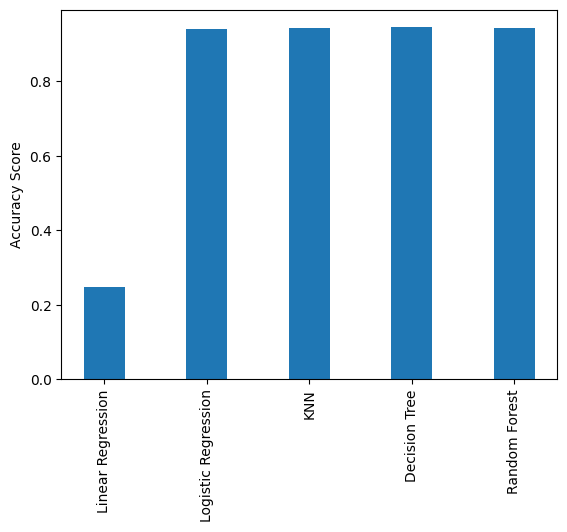

In [53]:
plt.xticks(xpos,algorithms,rotation=90)
plt.ylabel('Accuracy Score')
plt.bar(xpos,accuracy_score,width=0.4)